## Многоклассовая классификация

1. Загрузите из sklearn датасет с цифрами (каждый элемент кодирует изображение цифры размером 8х8)

2. Осмотрите данные и метки.

3. Попробуйте отобразить любое единичное изображение из набора с помощью matplotlib.

4. Примените тетрадку с прошлого урока к загруженному датасету в части многоклассовой классификации.

5. Рассмотрите матрицу неточностей, сделайте выводы какие цифры классификатор принимает за другие наиболее часто.

6. Сравните качество стратегий OvR и OvO.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix, precision_score, \
              recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score, \
              auc, mean_squared_error, accuracy_score

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
X = digits.data
Y = digits.target

In [5]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [6]:
X.shape

(1797, 64)

In [7]:
Y

array([0, 1, 2, ..., 8, 9, 8])

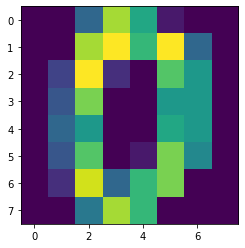

In [8]:
plt.imshow(digits.images[0])

In [9]:
from sklearn.linear_model import SGDClassifier
SGDclf = SGDClassifier(random_state = 42)

In [10]:
SGDclf.fit(X,Y)

SGDClassifier(random_state=42)

In [11]:
SGDclf.score(X,Y)

0.9699499165275459

In [12]:
pred = SGDclf.predict(X)

In [13]:
cm = confusion_matrix(Y, pred)
cm

array([[178,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 164,   1,   1,   0,   0,   0,   0,  14,   2],
       [  0,   0, 176,   0,   0,   0,   0,   0,   1,   0],
       [  0,   0,   0, 166,   0,   5,   0,   1,   8,   3],
       [  0,   1,   0,   0, 174,   1,   1,   1,   1,   2],
       [  0,   0,   0,   0,   0, 180,   0,   0,   1,   1],
       [  0,   0,   0,   0,   0,   0, 180,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0, 175,   1,   3],
       [  0,   1,   0,   0,   0,   0,   0,   0, 173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   3, 177]], dtype=int64)

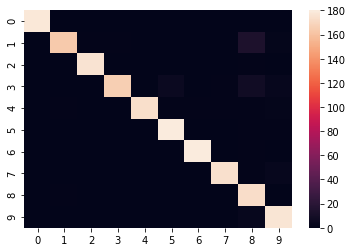

In [14]:
sns.heatmap(cm);

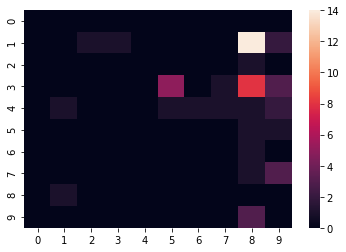

In [15]:
np.fill_diagonal(cm, 0)
sns.heatmap(cm);

В 14 случаях принимает "1" за "8"

В 8 случаях - "3" за "8"

В 5 случаях - "3" за "5"

В 3 случаях - "3" за "9" и т.д.

In [16]:
precision_score(Y, pred, average = 'macro'), recall_score(Y,pred, average = 'macro'), f1_score(Y,pred, average = 'macro')

(0.9720937814810465, 0.9702604940886219, 0.9701342616961084)

##### OvR

In [17]:
SGDclf.decision_function([X[254]])
# максимальный элемент на 9 позиции => число 9

array([[-1578.71599819, -2629.28205757, -3908.15091028, -2576.75090564,
        -2131.42439628, -1312.67297254, -2935.84566627, -1753.75634421,
         -113.62392697,   305.40399831]])

In [18]:
SGDclf.predict([X[254]])
# предсказывает маркировку класса для для образца Х

array([9])

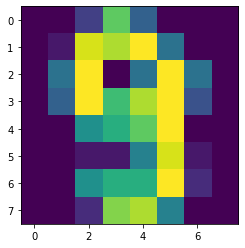

In [19]:
plt.imshow(digits.images[254])

##### OvO

In [20]:
from sklearn.multiclass import OneVsOneClassifier

In [21]:
ovoSGD = OneVsOneClassifier(SGDClassifier(random_state = 42))
ovoSGD.fit(X,Y)

OneVsOneClassifier(estimator=SGDClassifier(random_state=42))

In [22]:
ovoSGD.decision_function([X[254]])
# максимальное 9

array([[5.33325141, 1.66668344, 0.66667786, 6.33327215, 2.66670535,
        7.33322918, 0.66668178, 2.66668556, 8.33332457, 9.33332627]])

In [23]:
ovoSGD.predict([X[254]])

array([9])

In [24]:
ovoSGD.estimators_

(SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassi

In [25]:
pred2 = ovoSGD.predict(X)
pred[254]

9

In [26]:
precision_score(Y, pred2, average = 'macro'), recall_score(Y,pred2, average = 'macro'), f1_score(Y,pred2, average = 'macro') 

(1.0, 1.0, 1.0)

## Логистическая регрессия

1. Возьмите датасет с данными по телефонной компании с прошлых уроков.
2. Подготовьте данные для обучения.
3. Нормализуйте данные с помощью MinMaxScaler (рассматривали в конце прошлого урока)
4. Обучите логистическую регрессию на нормированных данных.
5. Посчитайте метрики на тестовом и обучающем множествах.


In [1]:
df_train = pd.read_csv('churn-bigml-80.csv')
df_test = pd.read_csv('churn-bigml-20.csv')

NameError: name 'pd' is not defined

In [28]:
df_train.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [29]:
df_test.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [30]:
df_train = df_train.drop(['State', 'Area code', 'Total day minutes', 'Total eve minutes','Total night minutes', 'Total intl minutes'], axis = 1)
df_test = df_test.drop(['State', 'Area code', 'Total day minutes', 'Total eve minutes','Total night minutes', 'Total intl minutes'], axis = 1)

In [31]:
df_train['International plan'] = df_train['International plan'].map({'No': 0 ,'Yes': 1})
df_train['Voice mail plan'] = df_train['Voice mail plan'].map({'No': 0 ,'Yes': 1})

df_test['International plan'] = df_test['International plan'].map({'No': 0 ,'Yes': 1})
df_test['Voice mail plan'] = df_test['Voice mail plan'].map({'No': 0 ,'Yes': 1})

In [32]:
df_train.head()

,Account length,International plan,Voice mail plan,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,0,1,25,110,45.07,99,16.78,91,11.01,3,2.70,1,False
1,107,0,1,26,123,27.47,103,16.62,103,11.45,3,3.70,1,False
2,137,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,False
3,84,1,0,0,71,50.90,88,5.26,89,8.86,7,1.78,2,False
4,75,1,0,0,113,28.34,122,12.61,121,8.41,3,2.73,3,False


In [33]:
df_test.head()

,Account length,International plan,Voice mail plan,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,Customer service calls,Churn
0,117,0,0,0,97,31.37,80,29.89,90,9.71,4,2.35,1,False
1,65,0,0,0,137,21.95,83,19.42,111,9.40,6,3.43,4,True
2,161,0,0,0,67,56.59,97,27.01,128,7.23,9,1.46,4,True
3,111,0,0,0,103,18.77,102,11.67,105,8.53,6,2.08,2,False
4,49,0,0,0,117,20.28,109,18.28,90,8.04,1,3.00,1,False


In [34]:
X_train = df_train.drop(['Churn'], axis = 1)
X_test = df_test.drop(['Churn'], axis = 1)

In [35]:
X_train.head()

,Account length,International plan,Voice mail plan,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,Customer service calls
0,128,0,1,25,110,45.07,99,16.78,91,11.01,3,2.70,1
1,107,0,1,26,123,27.47,103,16.62,103,11.45,3,3.70,1
2,137,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0
3,84,1,0,0,71,50.90,88,5.26,89,8.86,7,1.78,2
4,75,1,0,0,113,28.34,122,12.61,121,8.41,3,2.73,3


In [36]:
Y_train = df_train['Churn']
Y_test = df_test['Churn']

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
mm = MinMaxScaler()

In [39]:
X_train_norm = mm.fit_transform(X_train)

In [40]:
X_test_tr = mm.transform(X_test)

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
logReg = LogisticRegression()

In [43]:
logReg.fit(X_train_norm, Y_train)

LogisticRegression()

In [44]:
logReg.score(X_train_norm,Y_train), logReg.score(X_test_tr, Y_test)

(0.8634658664666166, 0.8545727136431784)

In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
pred_train = logReg.predict(X_train_norm)

In [47]:
pred_test = logReg.predict(X_test_tr)

In [48]:
cm1 = confusion_matrix (Y_test, pred_test)
cm1

array([[557,  15],
       [ 82,  13]], dtype=int64)

In [49]:
cm2 = confusion_matrix (Y_train, pred_train)
cm2

array([[2234,   44],
       [ 320,   68]], dtype=int64)

In [50]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [51]:
precision_score(Y_train, pred_train), recall_score(Y_train, pred_train), f1_score(Y_train, pred_train)

(0.6071428571428571, 0.17525773195876287, 0.272)

In [52]:
precision_score(Y_test, pred_test), recall_score(Y_test, pred_test),  f1_score(Y_test, pred_test)

(0.4642857142857143, 0.1368421052631579, 0.21138211382113825)